In [1]:
import __init__
#
from IPython.display import HTML, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display_dist(df, cn, m, sd):
    print 'mean %.3f' % m
    print 'sigma %.3f; 2sigma %.3f; 3sigma %.3f;' % (sd, 2 * sd, 3 * sd)
    df[cn].hist()

In [3]:
from information_boards import statisticsAllDrivers_ns_dpath
from information_boards import statisticsAllDriversTrip_ns1517_prefix
Y2009 = pd.read_csv('%s/%s2009.csv' % (statisticsAllDrivers_ns_dpath, statisticsAllDriversTrip_ns1517_prefix))
Y2010 = pd.read_csv('%s/%s2010.csv' % (statisticsAllDrivers_ns_dpath, statisticsAllDriversTrip_ns1517_prefix))

In [4]:
print len(Y2009)
outlier_index = set()
for cn in Y2009.columns:
    if cn in ['year', 'month', 'day','hour', 'driverID']:
        continue
    if cn == 'locQTime':
        outlier_set = set(np.where(Y2009[cn] > 120)[0].tolist())
        outlier_index = outlier_index.union(set(outlier_set))
    outlier_set = np.where((np.abs(Y2009[cn] - Y2009[cn].mean()) > (3 * Y2009[cn].std())))[0]
    outlier_index = outlier_index.union(set(outlier_set))
print len(outlier_index)
Y2009 = Y2009.drop(Y2009.index[list(outlier_index)])

14891
688


In [5]:
print len(Y2010)
outlier_index = set()
for cn in Y2010.columns:
    if cn in ['year', 'month', 'day','hour', 'driverID']:
        continue
    if cn == 'locQTime':
        outlier_set = set(np.where(Y2010[cn] > 120)[0].tolist())
        outlier_index = outlier_index.union(set(outlier_set))
    outlier_set = np.where((np.abs(Y2010[cn] - Y2010[cn].mean()) > (3 * Y2010[cn].std())))[0]
    outlier_index = outlier_index.union(set(outlier_set))
print len(outlier_index)
Y2010 = Y2010.drop(Y2010.index[list(outlier_index)])

15450
859


locQTime: after Filtering
mean 11.743
sigma 11.274; 2sigma 22.549; 3sigma 33.823;


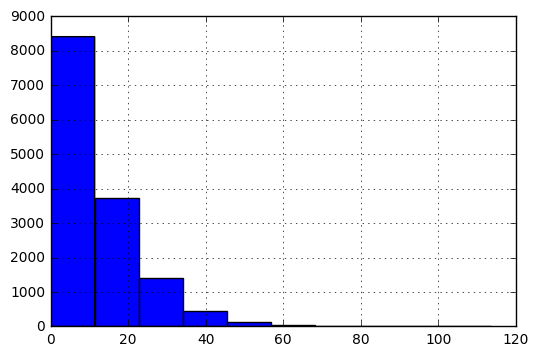

In [6]:
cn = 'locQTime'
print '%s: after Filtering' % cn
m, sd = Y2009[cn].mean(), Y2009[cn].std()
display_dist(Y2009, cn, m, sd)

locEP: after Filtering
mean 2.631
sigma 4.396; 2sigma 8.793; 3sigma 13.189;


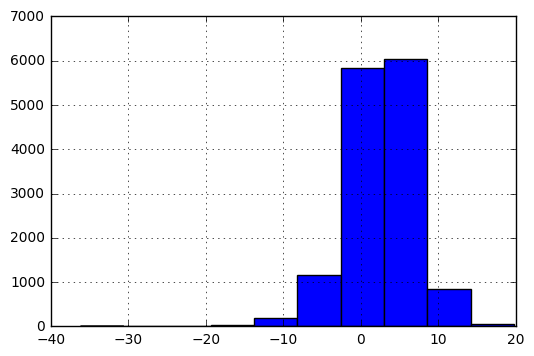

In [7]:
cn = 'locEP'
print '%s: after Filtering' % cn
m, sd = Y2009[cn].mean(), Y2009[cn].std()
display_dist(Y2009, cn, m, sd)

locProductivity: after Filtering
mean 28.537
sigma 8.718; 2sigma 17.435; 3sigma 26.153;


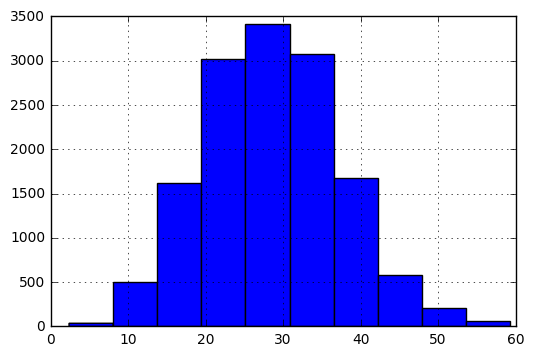

In [8]:
cn = 'locProductivity'
print '%s: after Filtering' % cn
m, sd = Y2009[cn].mean(), Y2009[cn].std()
display_dist(Y2009, cn, m, sd)

In [9]:
Y2010['locQTime'].max()

117.95

In [10]:
Y2009.columns

Index([u'year', u'month', u'day', u'hour', u'driverID', u'locQTime', u'locEP',
       u'locDuration', u'locFare', u'locProductivity', u'locIn', u'weekEnd',
       u'timePassed', u'timePassed^2'],
      dtype='object')

In [11]:
Y2009.to_csv('%s/Filtered-%s2009.csv' % (statisticsAllDrivers_ns_dpath, statisticsAllDriversTrip_ns1517_prefix) ,index=False)
Y2010.to_csv('%s/Filtered-%s2010.csv' % (statisticsAllDrivers_ns_dpath, statisticsAllDriversTrip_ns1517_prefix) ,index=False)